In [1]:
import aomip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

pyelsa not build with CUDA projector support


Optional call back to save history

In [2]:
fs = []
fy = []
step = 1
def callback1(x,y,i):
    if i % step == 0:
        fs.append(x)
        fy.append(y)
             

## Simple least square problem

Suggested solution

In [3]:
C = np.array([[2, 1], [1, 1]])
d = np.array([1, 1])
x0=np.array([15, 15])

xmingd, itr, history = aomip.compute_GD(C,d,0.01,x0,regularizer='gd',iteration=6000)
print('min:',xmingd)
print('iteration:',itr)

final x:  [-3.59997633e-04  1.00058249e+00]
min: [-3.59997633e-04  1.00058249e+00]
iteration: 5945


PGM with l2-Norm Squared proximal operator, $\beta$=0.01

[0.02800125 0.95323617]
705


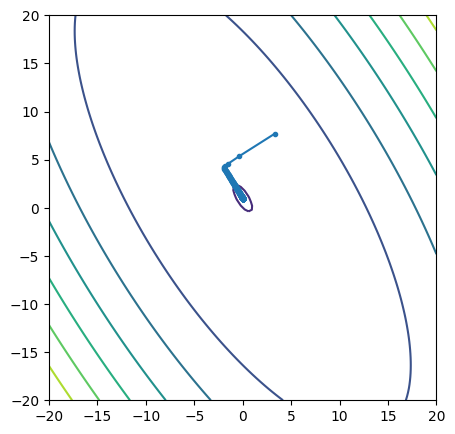

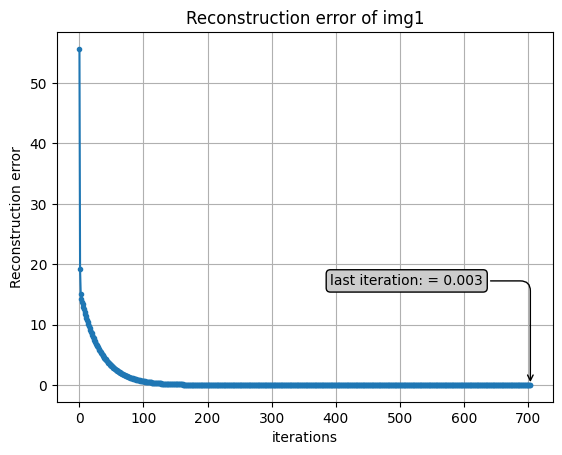

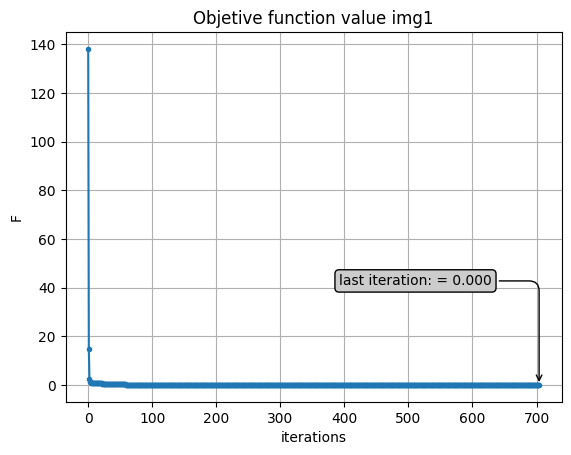

In [9]:
fs = []
fy = []
proxParams = {'v':x0, 'x':x0, 'beta':0.01}
xmin, hist = aomip.pgm(C,d,x0,aomip.proximalL2Squared,proxParams,iteration=1000,callback=callback1)
print(xmin)
print(hist)

plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)
fs_array = np.array(fs)
axes.plot(fs_array[:,0], fs_array[:,1], marker='.')
plt.show()

aomip.plot_convergence(xmingd,fs,hist,'img1','img1')
aomip.plot_objective_value(fy,hist,'img1','img1')

PGM with Huber proximal operator, $\beta$=0.01; $\delta$=100

[0.02777941 0.95360744]
706


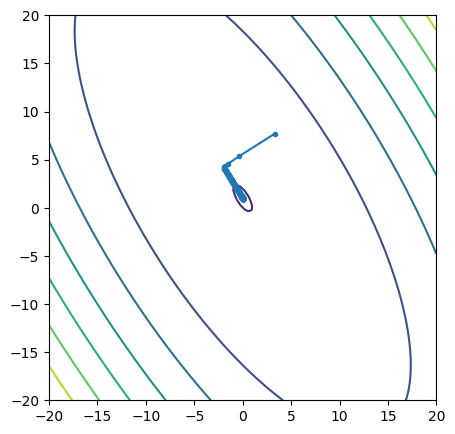

In [10]:
fs = []
fy = []
proxParamsH = {'v':x0, 'x':x0, 'beta':0.1, 'delta': 100}
xmin, hist = aomip.pgm(C,d,x0,aomip.proximalHuber,proxParamsH,iteration=1000,callback=callback1)
print(xmin)
print(hist)
plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)
fs_array = np.array(fs)
axes.plot(fs_array[:,0], fs_array[:,1], marker='.')
plt.show()

fast PGM with l2-Norm Squared proximal operator, similar parameter setting with PGM with l2-Norm Squared proximal operator above, this shows the accelerated convergence

momentum parameter $\alpha_k$ = $\frac{k-1}{k+2}$

[0.02828622 0.95277508]
444


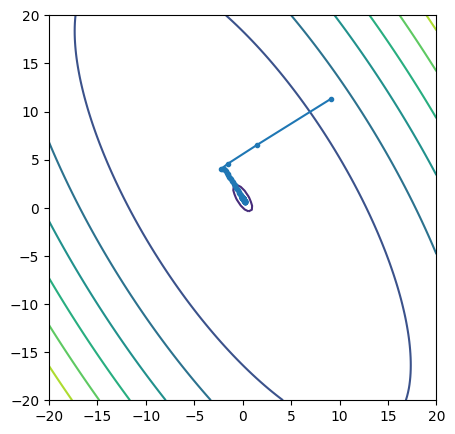

In [11]:
fs = []
fy = []
xmin, hist = aomip.fast_pgm(C,d,x0,aomip.proximalL2Squared,proxParams,momentum=1,callback=callback1)
print(xmin)
print(hist)
plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)
fs_array = np.array(fs)
axes.plot(fs_array[:,0], fs_array[:,1], marker='.')
plt.show()

momentum parameter $\alpha_k$ = $\frac{t_{k-1}-1}{t_k}$, $t_k=\frac{1}{2}(1+\sqrt{1+4t^2})$, This momentum parameter converges faster that the previous momentum parameter

[0.02831032 0.95273608]
442


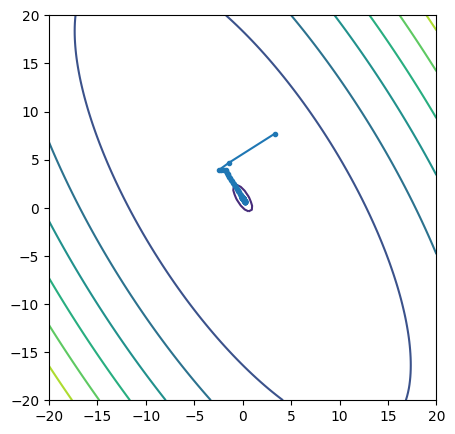

In [12]:
fs = []
fy = []
xmin, hist = aomip.fast_pgm(C,d,x0,aomip.proximalL2Squared,proxParams,momentum=2,callback=callback1)
print(xmin)
print(hist)
plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)
fs_array = np.array(fs)
axes.plot(fs_array[:,0], fs_array[:,1], marker='.')
plt.show()

(b) Uniqueness of formulation 
$$f(x)=\frac{1}{2} ||Ax-b||_2^2 + \frac{\beta}{2}||x||_2^2$$

(i) $$g(x)=\frac{1}{2} ||Ax-b||_2^2 + \frac{\beta}{2}||x||_2^2$$
 $$h(x)=0$$
 $\beta$=0.05

[0.11087913 0.81335172]
573


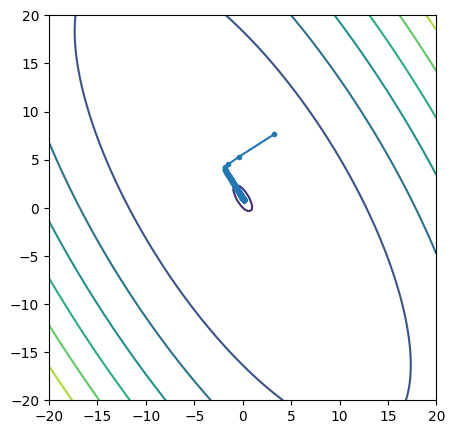

In [13]:
fs = []
fy = []
proxParams = {'v':d, 'x':x0, 'sigma':0.01, 'beta':0.05}
xmin, hist = aomip.pgm(C,d,x0,aomip.proximalIdentity,proxParams,beta=proxParams['beta'],regularizer='tikhonov',iteration=1000,callback=callback1)
print(xmin)
print(hist)

plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)
fs_array = np.array(fs)
axes.plot(fs_array[:,0], fs_array[:,1], marker='.')
plt.show()

Translated by a [1,1] vector, eg, 1 unit away, translation function g(x-y) is an identity proximal operator

[-3.55536440e-05  1.00005753e+00]
748


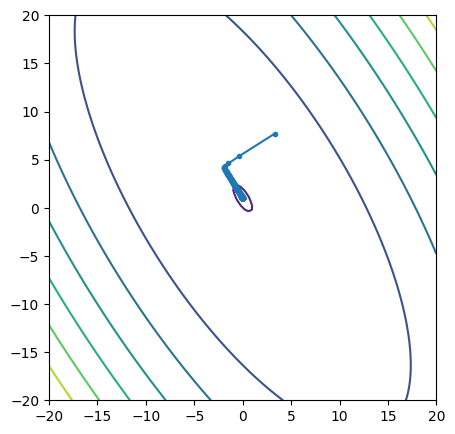

In [14]:
fs = []
fy = []
proxParams2 = {'v':d, 'x':x0, 'y':np.ones(2), 'g':aomip.proximalIdentity, 'beta':0.1}
xmin, hist = aomip.pgm(C,d,x0,aomip.proximalTranslation,proxParams2,beta=proxParams['beta'],iteration=1000,callback=callback1)
print(xmin)
print(hist)

plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)
fs_array = np.array(fs)
axes.plot(fs_array[:,0], fs_array[:,1], marker='.')
plt.show()

(ii) $$g(x)=\frac{1}{2} ||Ax-b||_2^2 $$
    $$ h(x)=\frac{\beta}{2}||x||_2^2$$
    $\beta$=0.01

[0.11087919 0.81335163]
576


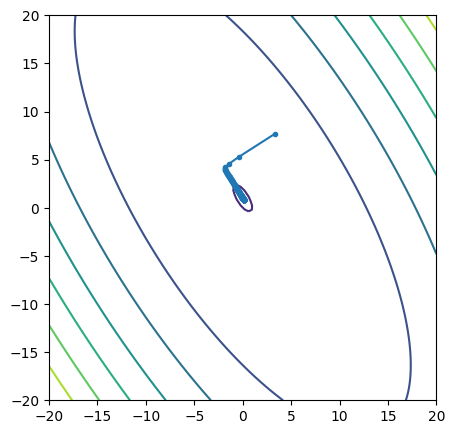

In [15]:
fs = []
fy = []
proxParams = {'v':d, 'x':x0, 'sigma':0.01, 'beta':0.05}
xmin, hist = aomip.pgm(C,d,x0,aomip.proximalL2Squared,proxParams,iteration=1000,callback=callback1)
print(xmin)
print(hist)

plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)
fs_array = np.array(fs)
axes.plot(fs_array[:,0], fs_array[:,1], marker='.')
plt.show()

Convergence speed is found to be worse in this formulation

(c) Elastic net formulation
$$f(x)=\frac{1}{2} ||Ax-b||_2^2 +\tau||x||_1 +\frac{\beta}{2}||x||_2^2$$
$\tau$=0.01; $\beta$=0.01

[0.03725273 0.93445287]
665


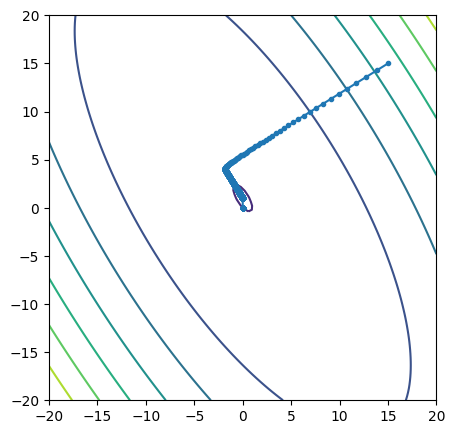

In [11]:
fs = []
fy = []
proxParams = {'v':d, 'x':x0, 'tau':0.01, 'beta':0.01}
xmin, hist = aomip.pgm(C,d,x0,aomip.proximalElasticNet,proxParams,iteration=1000,callback=callback1)
print(xmin)
print(hist)

plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)
axes.plot(history[0,:], history[1,:], marker='.')
plt.show()

## Homework 3: Restart Condition

fixed restart every 100 iteration

[0.11046528 0.81402134]
576


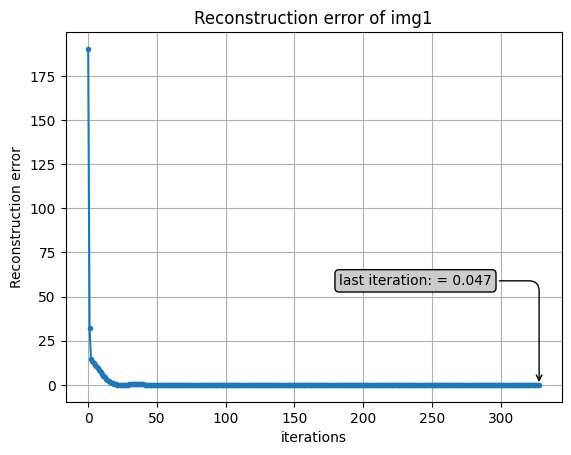

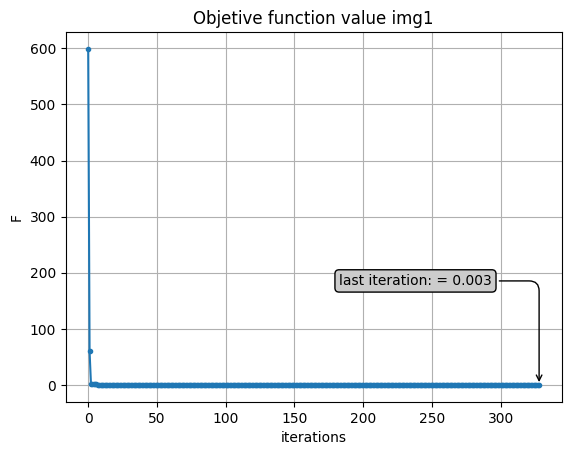

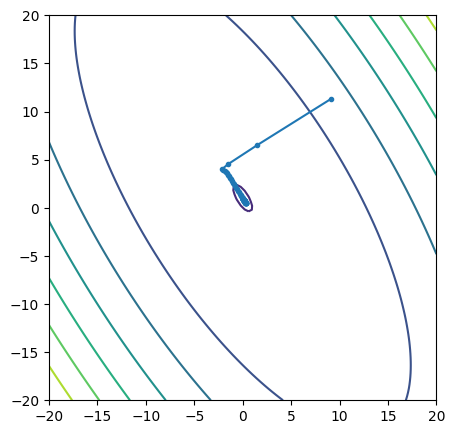

In [17]:
fs = []
fy = []
beta=proxParams['beta']
xmin, stopIdx = aomip.fast_pgm(C,d,x0,aomip.proximalL2Squared,proxParams,momentum=1,restart=True,restartItr=100,callback=callback1)
print(xmin)
print(hist)
aomip.plot_convergence(xmingd,fs,stopIdx,'img1','img1')
aomip.plot_objective_value(fy,stopIdx,'img1','img1')
plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)
fs_array = np.array(fs)
axes.plot(fs_array[:,0], fs_array[:,1], marker='.')
plt.show()

Fast PGM with restart condition, restart every 100 iteration, this is in fact the same experiment with the fast PGM with l2-Norm Squared proximal operator above. Previously it converges in 444 iteration but it takes only 372 iteration here to converge. But surprisingly, changing the momentum term does not speed up the convergence as it does before without restart condition.

[0.11092775 0.81327307]
576


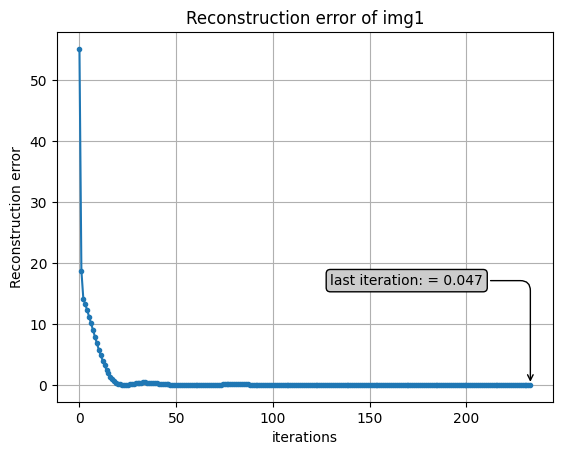

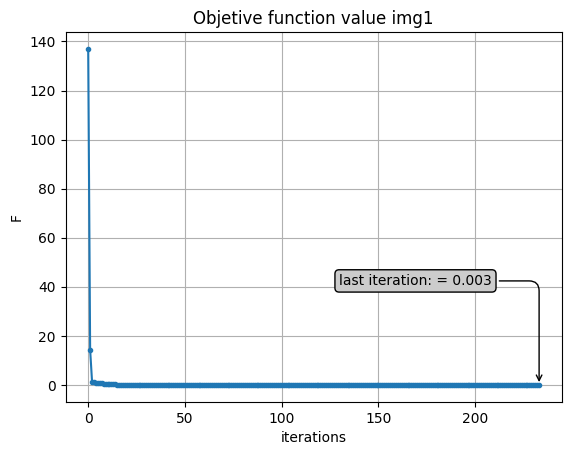

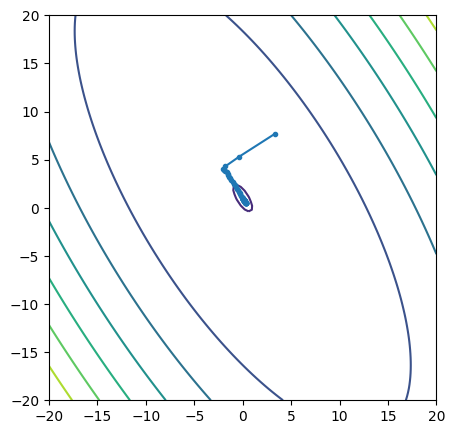

In [16]:
fs = []
fy = []
C = np.array([[2, 1], [1, 1]])
d = np.array([1, 1])
x0=np.array([15, 15])
beta=proxParams['beta']
xmin, stopIdx = aomip.fast_pgm(C,d,x0,aomip.proximalL2Squared,proxParams,momentum=2,restart=True,restartItr=100,callback=callback1)
print(xmin)
print(hist)
aomip.plot_convergence(xmingd,fs,stopIdx,'img1','img1')
aomip.plot_objective_value(fy,stopIdx,'img1','img1')

plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)
fs_array = np.array(fs)
axes.plot(fs_array[:,0], fs_array[:,1], marker='.')
plt.show()

OGM with restart condition, restart every 200 iteration

step size OGM:  0.1
final x:  [-3.4671973e-05  1.0000561e+00]


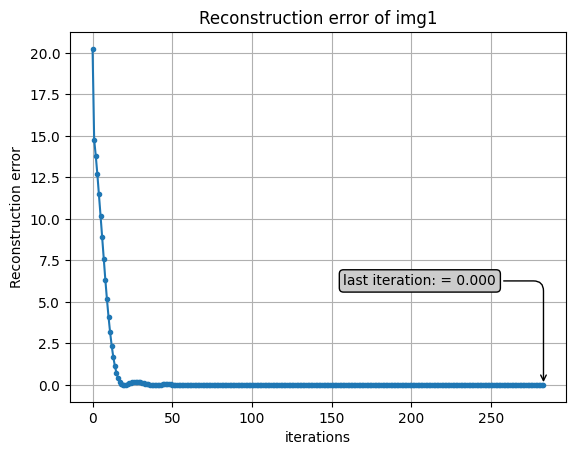

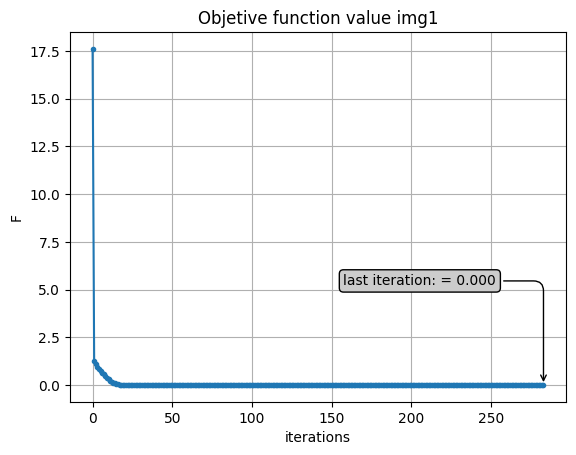

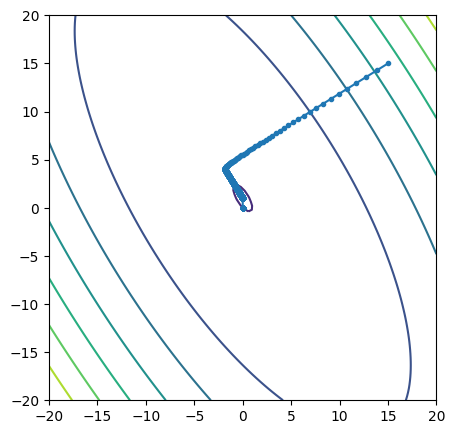

In [42]:
fs = []
fy = []
xmin, stopIdx = aomip.compute_OGM1(C,d,x0,restart=True,restartItr=200,callback=callback1)
stepsize = int(stopIdx/step)
aomip.plot_convergence(xmingd,fs,stopIdx,'img1','img1')
aomip.plot_objective_value(fy,stopIdx,'img1','img1')

plt.figure(figsize=(5,5))
axes = plt.gca()
aomip.plotFunctionContour(aomip.myFunction, [-20, 20], 100, axes)
axes.plot(history[0,:], history[1,:], marker='.')
plt.show()